Plasmonic properties of hyperdoped dielectrics
=================================

*Author: Clément Majorel (doped material description by C. Majorel)*


In this example, we reproduce the near-field intensity maps from [1], showing almost vanishing near-field contrast for doped dielectric nano-structures at the wavelength of their plasmonic optical response.

[1] C. Majorel et al. *Theory of plasmonic properties of hyper-doped silicon nanostructures*. **Optics Communications** 453, 124336 (2019) (http://dx.doi.org/10.1016/j.optcom.2019.124336)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

from pyGDM2 import core
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import linear
from pyGDM2 import tools
from pyGDM2 import propagators
from pyGDM2 import visu

Simulation setup
----------------------

Setting up the structure, we first create a base geometry, which we copy several times. Each copy of the structure is then rotated, translated and configured with different materials.

In [2]:
## --------------- Setup
mesh = 'cube'
step = 10.0

L=10
W=10
H=5


## ------- geometry
geo_base = structures.rect_wire(step, L=L,H=H,W=W, mesh=mesh)
geo_base = structures.center_struct(geo_base)
print("Number of dipoles :",len(geo_base))

## -- copy, rotate and translate the pads
geo1 = copy.deepcopy(geo_base)
geo1 = structures.shift(geo1, [-200, -200, 0])

geo2 = copy.deepcopy(geo_base)
geo2 = structures.rotate_XY(geo2, 60.)
geo2 = structures.shift(geo2, [0, 50, 0])

geo3 = copy.deepcopy(geo_base)
geo3 = structures.rotate_XY(geo3, 45.)
geo3 = structures.shift(geo3, [-300, 220, 0])

geo4 = copy.deepcopy(geo_base)
geo4 = structures.rotate_XY(geo4, 30.)
geo4 = structures.shift(geo4, [225, -250, 0])

geo5 = copy.deepcopy(geo_base)
geo5 = structures.rotate_XY(geo5, 15.)
geo5 = structures.shift(geo5, [160, 350, 0])


## merge pads to full geometry
geometry = np.concatenate([geo1, geo2, geo3, geo4, geo5])


## ------- define materials
mat_si = materials.silicon()
mat_si_N = materials.hyperdopedSilicon(N_dop=5e20, factor_gamma=0.1)
mat_si_N1 = materials.hyperdopedSilicon(N_dop=2.5e20, factor_gamma=0.1)
mat_si_N2 = materials.hyperdopedSilicon(N_dop=1.25e20, factor_gamma=0.1)
mat_si_N3 = materials.hyperdopedSilicon(N_dop=5.625e20, factor_gamma=0.1)
mat_si_N4 = materials.hyperdopedSilicon(N_dop=6.25e20, factor_gamma=0.1)

## simulation 1: all pads undoped
material_undop = mat_si

## simulation 2: each pad different doping
material_no_uni_dop = (
    len(geo1)*[mat_si_N] +
    len(geo2)*[mat_si_N1] +
    len(geo3)*[mat_si_N2] +
    len(geo4)*[mat_si_N3] +
    len(geo5)*[mat_si_N4]
    )

## simulation 3: all pads with doping
material_uni_dop = mat_si_N

## ------- init. structures
struct_undop = structures.struct(step, geometry, material_undop)
struct_no_uni_dop = structures.struct(step, geometry, material_no_uni_dop)
struct_uni_dop = structures.struct(step, geometry, material_uni_dop)


## ------- incident field
wavelengths = [2754.]
field_generator = fields.plane_wave
kwargs = dict(theta=0)

efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)


## ------- environment: n2=1.65 over glass substrate n1=1.5
n1, n2, n3 = 1.5, 1.65, 1.65 # constant environment
dyads = propagators.DyadsQuasistatic123(n1, n2, n3)


## ------- simulation initialization
sim_undop = core.simulation(struct_undop, efield, dyads)
sim_no_uni_dop = core.simulation(struct_no_uni_dop, efield, dyads)
sim_uni_dop = core.simulation(struct_uni_dop, efield, dyads)

Number of dipoles : 500
structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 2500/2500 dipoles valid
structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 2500/2500 dipoles valid
structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 2500/2500 dipoles valid


Run the simulation
---------------------------------------

After the main simulations (*scatter*), we calculate near-field maps at 10nm above to top surface of the nanostructures.

In [3]:
## --- run the simulation
core.scatter(sim_undop)
core.scatter(sim_no_uni_dop)
core.scatter(sim_uni_dop)


## --- nearfield 10nm above structure
r = tools.generate_NF_map_XY(-500, 500, 101, -500, 500, 101, Z0=60)

Es_undop, Etot_undop, Bs_undop, Btot_undop = linear.nearfield(
        sim_undop, field_index=0, r_probe=r)

Es_no_uni_dop, Etot_no_uni_dop, Bs_no_uni_dop, Btot_no_uni_dop = linear.nearfield(
        sim_no_uni_dop, field_index=0, r_probe=r)

Es_uni_dop, Etot_uni_dop, Bs_uni_dop, Btot_uni_dop = linear.nearfield(
        sim_uni_dop, field_index=0, r_probe=r)

timing for wl=2754.00nm - setup: EE 2751.1ms, inv.: 2459.1ms, repropa.: 518.8ms (1 field configs), tot: 5729.5ms
timing for wl=2754.00nm - setup: EE 1353.6ms, inv.: 2624.3ms, repropa.: 74.3ms (1 field configs), tot: 4052.5ms
timing for wl=2754.00nm - setup: EE 1328.0ms, inv.: 2438.1ms, repropa.: 74.6ms (1 field configs), tot: 3841.1ms


Plot the nearfield intensity maps
---------------------------------------------

/home/hans/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


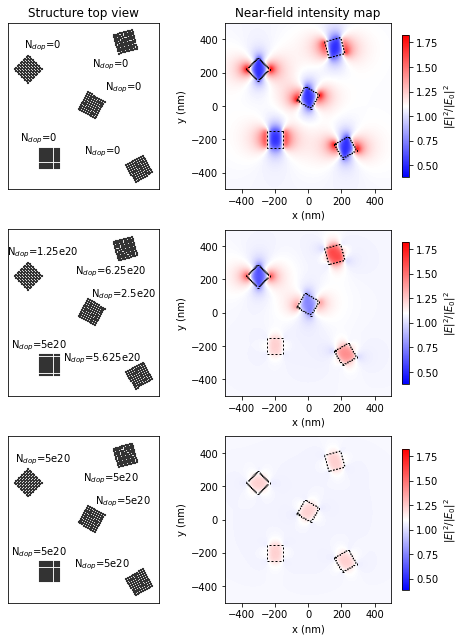

In [4]:
plt.figure(figsize=(7.,9.))

## ------------------------------- first line plot
## -- structure geometry projection
plt.subplot(321, aspect='equal')
plt.title("Structure top view")
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
visu.structure(sim_undop, color='auto', show=False)

## -- doping information
plt.text(-230, 300, r"N$_{dop}$=0", ha='center', va='bottom')
plt.text(-250, -140, r"N$_{dop}$=0", ha='center', va='bottom')
plt.text(90, 210, r"N$_{dop}$=0", ha='center', va='bottom')
plt.text(150, 100, r"N$_{dop}$=0", ha='center', va='bottom')
plt.text(50, -200, r"N$_{dop}$=0", ha='center', va='bottom')

## -- field-amplitude map
plt.subplot(322, aspect='equal')
plt.title("Near-field intensity map")
visu.structure_contour(sim_undop, zorder=10, dashes=[2,2], color='k', show=0)
im1 = visu.vectorfield_color(Etot_undop, fieldComp='I', cmap='bwr', show=0, interpolation='bicubic')
im1.set_clim(0.381397, 1.8241704)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
plt.colorbar(im1, shrink=0.85, label=r'$|E|^2/|E_0|^2$')


## ------------------------------- second line plot
## -- structure geometry projection
plt.subplot(323, aspect='equal')
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
visu.structure(sim_no_uni_dop, color='auto', show=False)

## -- doping information
plt.text(-230, 300, r"N$_{dop}$=1.25e20", ha='center', va='bottom')
plt.text(-250, -140, r"N$_{dop}$=5e20", ha='center', va='bottom')
plt.text(90, 210, r"N$_{dop}$=6.25e20", ha='center', va='bottom')
plt.text(150, 100, r"N$_{dop}$=2.5e20", ha='center', va='bottom')
plt.text(50, -200, r"N$_{dop}$=5.625e20", ha='center', va='bottom')

## -- field-amplitude map
plt.subplot(324, aspect='equal')
visu.structure_contour(sim_no_uni_dop, zorder=10, dashes=[2,2], color='k', show=0)
im1 = visu.vectorfield_color(Etot_no_uni_dop, fieldComp='I', cmap='bwr', show=0, interpolation='bicubic')
im1.set_clim(0.381397, 1.8241704)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
plt.colorbar(im1, shrink=0.85, label=r'$|E|^2/|E_0|^2$')


## ------------------------------- second line plot
## -- structure geometry projection
plt.subplot(325, aspect='equal')
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
visu.structure(sim_uni_dop, color='auto', show=False)

## -- doping information
plt.text(-230, 300, r"N$_{dop}$=5e20", ha='center', va='bottom')
plt.text(-250, -140, r"N$_{dop}$=5e20", ha='center', va='bottom')
plt.text(90, 210, r"N$_{dop}$=5e20", ha='center', va='bottom')
plt.text(150, 100, r"N$_{dop}$=5e20", ha='center', va='bottom')
plt.text(50, -200, r"N$_{dop}$=5e20", ha='center', va='bottom')

## -- field-amplitude map
plt.subplot(326, aspect='equal')
visu.structure_contour(sim_uni_dop, zorder=10, dashes=[2,2], color='k', show=0)
im1 = visu.vectorfield_color(Etot_uni_dop, fieldComp='I', cmap='bwr', show=0, interpolation='bicubic')
im1.set_clim(0.381397, 1.8241704)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
plt.colorbar(im1, shrink=0.85, label=r'$|E|^2/|E_0|^2$')

plt.tight_layout()
plt.show()
